In [18]:
import os,sys
import datetime as dt
import xarray as xr
import time
import numpy as np
# np.set_printoptions(threshold=np.inf)
import seaborn as sns
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt
import math
from datetime import datetime
import matplotlib.colors as mcolors
import matplotlib as mpl

# !pip install --user meteva

In [19]:
# from skimage import measure
# from skimage import filters
import math
#from mpl_toolkits.basemap import Basemap, cm
from datetime import datetime
import matplotlib.colors as mcolors
import matplotlib as mpl
%matplotlib inline

In [194]:
# # import meteva.base as meb      # 该模块用于IO和基础计算
# # import meteva.method as mem    # 该模块基础了检验的基础算法
# # import meteva.product as mpd   # 该模块包含了检验的工具
# import numpy as np          
# import datetime                      
# import copy
# import pandas as pd
# import xarray as xr
# import os
# import matplotlib.pyplot as plt

In [41]:
#save_dir = '/p/scratch/deepacf/deeprain/ji4/Downsacling/results/swinUnet_exp1019_origin_booster_3years/prediction_18000'
#save_dir = "/p/home/jusers/gong1/juwels/bing_folder/downscaling_maelstrom/results/exp_20230319_swinunet_remove_last_batch_test"
#save_dir = "/p/scratch/deepacf/deeprain/ji4/Downsacling/results/unet_exp_20230130_580000_G"
save_dir = "/p/home/jusers/gong1/hdfml/bing/downscaling_maelstrom/results/exp_20230421_epoch20_postprocess/"
model_name = 'unet'
#prcp_downs_swinUnet_1.nc
filename = 'prcp_downs_'+model_name+'_1.nc'
filepath = os.path.join(save_dir,filename)
with xr.open_dataset(filepath, engine="netcdf4") as df:
    print(df)
    fcst = np.array(df['fcst'][:])
    refe = np.array(df['refe'][:])
    inpt = np.array(df['inputs'][:])
    time = np.array(df['time'][:]) 
    

<xarray.Dataset>
Dimensions:    (pitch_idx: 100032, time: 9399, lat: 160, lon: 160, lat_in: 16, lon_in: 16)
Coordinates:
  * pitch_idx  (pitch_idx) int32 93461 26074 45994 39126 ... 5457 67125 74260
  * time       (time) datetime64[ns] 2020-01-01T07:00:00 ... 2020-01-19T05:00:00
Dimensions without coordinates: lat, lon, lat_in, lon_in
Data variables:
    fcst       (time, lat, lon) float32 ...
    refe       (time, lat, lon) float32 ...
    inputs     (time, lat_in, lon_in) float32 ...
Attributes:
    description:  Precipitation downscaling data.


In [42]:
np.min(fcst)

3.7858263e-06

In [43]:
np.min(refe)

-9.313226e-10

In [44]:
np.max(fcst)

1685.6677

In [45]:
np.max(refe)

13.862568

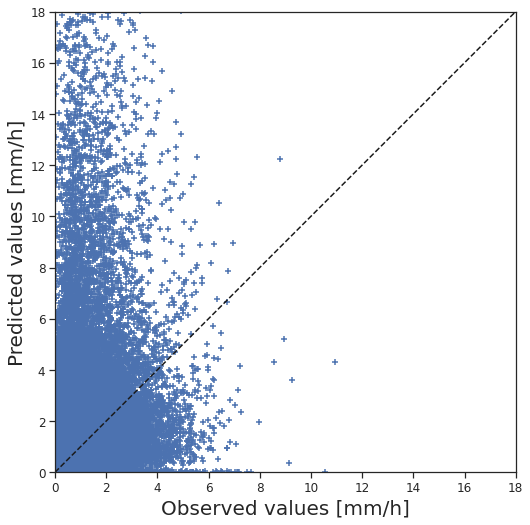

In [46]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
plt.scatter(refe[:,::10,::10].flatten(),fcst[:,::10,::10].flatten(),marker='+')

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
# plt.title('threshold: '+threshold+'mm', fontsize=14,loc='center',pad=6)
# legend = ax.legend(loc='upper right', bbox_to_anchor=(1.58, 0.75), fontsize=14) # 'upper right', bbox_to_anchor=(1.38, 0.8),

ax.plot((0, 1), (0, 1), transform=ax.transAxes, ls='--',c='k', label="1:1 line")

ax.set_xlim([0, 18])
ax.set_ylim([0, 18])
ax.set_xlabel("Observed values [mm/h]",fontsize=20)
ax.set_ylabel("Predicted values [mm/h]",fontsize=20)

figname = model_name+'_scatters'
figpath = os.path.join(save_dir,figname)
#plt.savefig(figpath, bbox_inches="tight")
plt.show()

In [27]:
# grade_list = [0.1,5,10,20]
# half_window_size_list = [3,5,10]

# rmse = []
# corr = []
# pc = []
# pc_of_sun_rain = []
# pod = []
# pofd = []
# far = []
# mr = []
# bias = []
# ts = []
# ets = []
# fscore = []
# fss_middle = []
# for i in range(refe.shape[0]):
#     rmse.append(mem.rmse(refe[i],fcst[i]))
#     corr.append(mem.corr(refe[i],fcst[i]))    
#     pc.append(mem.pc(refe[i],fcst[i],grade_list=grade_list))
#     pc_of_sun_rain.append(mem.pc_of_sun_rain(refe[i],fcst[i]))
#     pod.append(mem.pod(refe[i],fcst[i],grade_list=grade_list))
#     pofd.append(mem.pofd(refe[i],fcst[i],grade_list=grade_list))
#     far.append(mem.far(refe[i],fcst[i],grade_list=grade_list))
#     mr.append(mem.mr(refe[i],fcst[i],grade_list=grade_list))
#     bias.append(mem.bias(refe[i],fcst[i],grade_list=grade_list))
#     ts.append(mem.ts(refe[i],fcst[i],grade_list=grade_list))
#     ets.append(mem.ets(refe[i],fcst[i],grade_list=grade_list))
#     fscore.append(mem.fscore(refe[i],fcst[i],grade_list=grade_list))
#     fss_middle.append(mem.fbs_pobfo(refe[i],fcst[i],grade_list=grade_list, 
#                                     half_window_size_list=half_window_size_list))

# rmse = np.stack(rmse)    
# corr = np.stack(corr)    
# pc = np.stack(pc)
# pc_of_sun_rain = np.stack(pc_of_sun_rain)
# pod = np.stack(pod)
# pofd = np.stack(pofd)
# far = np.stack(far)
# mr = np.stack(mr)
# bias = np.stack(bias)
# ts = np.stack(ts)
# ets = np.stack(ets)
# fscore = np.stack(fscore)
# fss_middle_all = np.stack(fss_middle)

# fss = np.ones([refe.shape[0],len(grade_list),len(half_window_size_list)])
# for k in range(refe.shape[0]):
#     for i in range(len(grade_list)):
#         for j in range(len(half_window_size_list)):
#             fss[k,i,j] = 1 - fss_middle_all[k,j,i,2].sum()/(fss_middle_all[k,j,i,0].sum()+fss_middle_all[k,j,i,1].sum())

# corr[np.where(corr>1)] = np.nan
# pc[np.where(pc>1)] = np.nan
# pc_of_sun_rain[np.where(pc_of_sun_rain>1)] = np.nan
# pod[np.where(pod>1)] = np.nan
# pofd[np.where(pofd>1)] = np.nan
# far[np.where(far>1)] = np.nan
# mr[np.where(mr>1)] = np.nan
# ts[np.where(ts>1)] = np.nan
# ets[np.where(ets>1)] = np.nan
# fss[np.where(fss>1)] = np.nan
            

In [28]:
# data = {'RMSE':  rmse,
#         'CORR':  corr,
#         'PC_of_sun_rain': pc_of_sun_rain,
#         'TS0.1': ts[:,0],
#         'TS5': ts[:,1],
# #         'TS10': ts[:,3],
#         'ETS0.1': ets[:,0],
#         'ETS5': ets[:,1],
# #         'ETS10': ets[:,3],
#         'FAR0.1': far[:,0],
#         'FAR5': far[:,1],
# #         'FAR10': far[:,3],
#         'POM0.1': mr[:,0],
#         'POM5': mr[:,1],
# #         'POM10': mr[:,3],
#         'FSS0.1': fss[:,0,1],
#         'FSS5': fss[:,1,1],
# #         'FSS10': fss[:,3,1],
#        }
# unet_all_vars = pd.DataFrame(data=data)

In [29]:
# fig_path = os.path.join(save_dir,'unet_scores')
# f, ax = plt.subplots(figsize=(8, 5))

# sns.set_theme(style="ticks")
# ax = sns.boxplot(data=unet_all_vars, orient="h",
#                  palette="Set2", showfliers=False)
# # ax.axhline(y=0, color="grey", linewidth=.5)
# ax.set_xlabel('Scores', fontsize=16, labelpad=8)
# # ax.set_ylabel('Continuous Ranked Probability Score', fontsize=14, labelpad=6)
# ax.xaxis.grid(False)
# ax.yaxis.grid(False)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# sns.despine(trim=True, left=True)
# # plt.legend(title = "Model", 
# #            fontsize = '10', title_fontsize = "10",
# #            loc = 2, bbox_to_anchor = (1.01,0.7))
# plt.savefig(fig_path, bbox_inches="tight")
# plt.show()
# plt.close()

In [30]:
# create colormaps
clevs = np.array([0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750])*1e-2
label = 'Precipitation Rate [mm/hour]'
cmap_data = [(1.0, 1.0, 1.0),
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
             (0.4000000059604645, 0.20000000298023224, 0.0)]

cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
cmap.set_bad(color='grey')
norm = mcolors.BoundaryNorm(clevs, cmap.N)

In [31]:
def spatial_plot(prcp,title,figname):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])

    if '_in' in title:
        dx, dy = 1, 1
    else:
        dx, dy = 0.1, 0.1
    y, x = np.mgrid[slice(-8, 8+dy, dy),
                slice(-8, 8+dx, dx)]

    cs = plt.pcolormesh(x,y,prcp,cmap=cmap,norm=norm,vmin=0.)
    plt.yticks(np.arange(-8,10,2),fontsize=18)
    plt.xticks(np.arange(-8,10,2),fontsize=18)

    # # add colorbar.
    label = 'Precipitation rate [mm/h]'    
    cbar = plt.colorbar(cs,location='right',pad=0.03)
    cbar.set_label(label,fontsize=20) # 10$\mathregular{^-}$$\mathregular{^1}$ 
    
    plt.title(title, fontsize=20,loc='center',pad=6)

    # save to disk
    #plt.savefig(figname, bbox_inches="tight")
    plt.show()

In [32]:
iet = np.where(np.nansum(refe,(1,2))==np.nanmax(np.nansum(refe,(1,2))))[0][0]

/tmp/ipykernel_31295/3547275331.py:12: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  cs = plt.pcolormesh(x,y,prcp,cmap=cmap,norm=norm,vmin=0.)


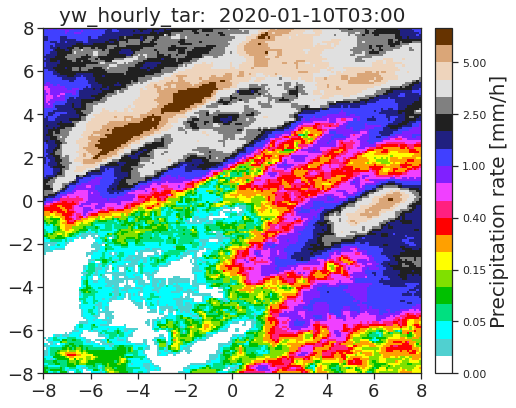

In [33]:
prcp = refe[iet]
tim = str(time[iet])[:16]
title = "yw_hourly_tar:  "+tim
figname = "yw_hourly_tar_"+tim
figpath = os.path.join(save_dir,figname)
spatial_plot(prcp,title,figpath)


/tmp/ipykernel_31295/3547275331.py:12: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  cs = plt.pcolormesh(x,y,prcp,cmap=cmap,norm=norm,vmin=0.)


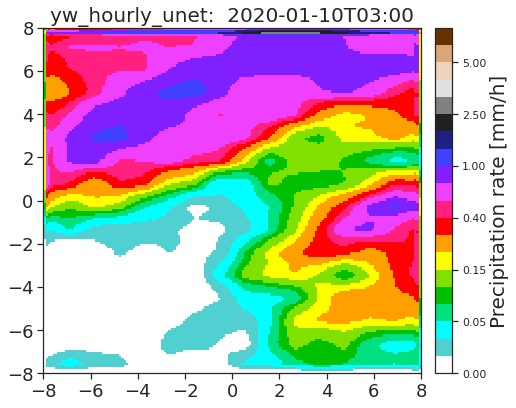

In [34]:
prcp = fcst[iet]
title = "yw_hourly_"+model_name+":  "+tim
figname = "yw_hourly_"+model_name+"_"+tim
figpath = os.path.join(save_dir,figname)
spatial_plot(prcp,title,figpath)

/tmp/ipykernel_31295/3547275331.py:12: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  cs = plt.pcolormesh(x,y,prcp,cmap=cmap,norm=norm,vmin=0.)


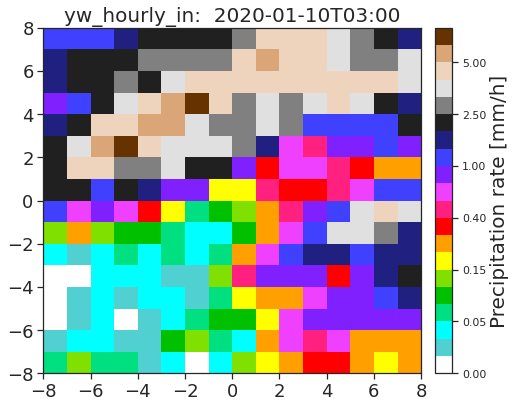

In [35]:
prcp = inpt[iet]
title = "yw_hourly_in:  "+tim
figname = "yw_hourly_in_"+tim
figpath = os.path.join(save_dir,figname)
spatial_plot(prcp,title,figpath)


In [48]:
    # Set default hyper-parameters for all the models and used for wandb log
    config = {"epochs":2
              }
    # This is the model hparameters should be tailored to each model afterwards
    hparams = {}

In [49]:
config.update(hparams)

In [50]:
config

{'epochs': 2}